In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
df_iris=pd.read_csv('Iris.csv')

In [253]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [254]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [255]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


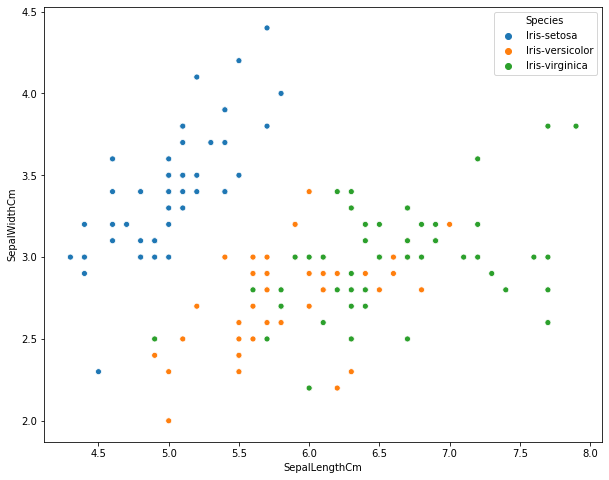

In [256]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_iris.SepalLengthCm,df_iris.SepalWidthCm,hue=df_iris.Species)

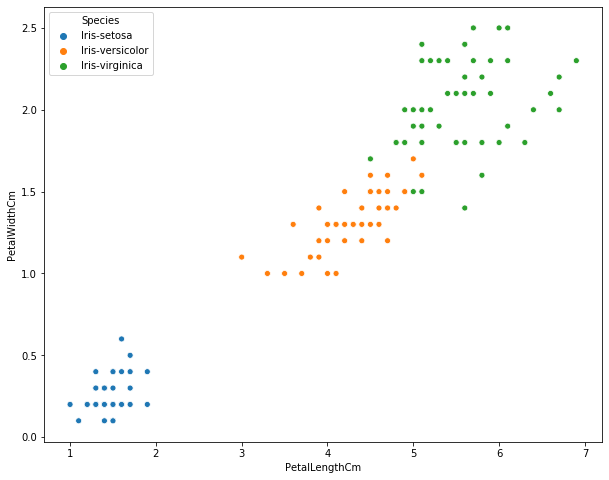

In [257]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_iris.PetalLengthCm,df_iris.PetalWidthCm,hue=df_iris.Species)

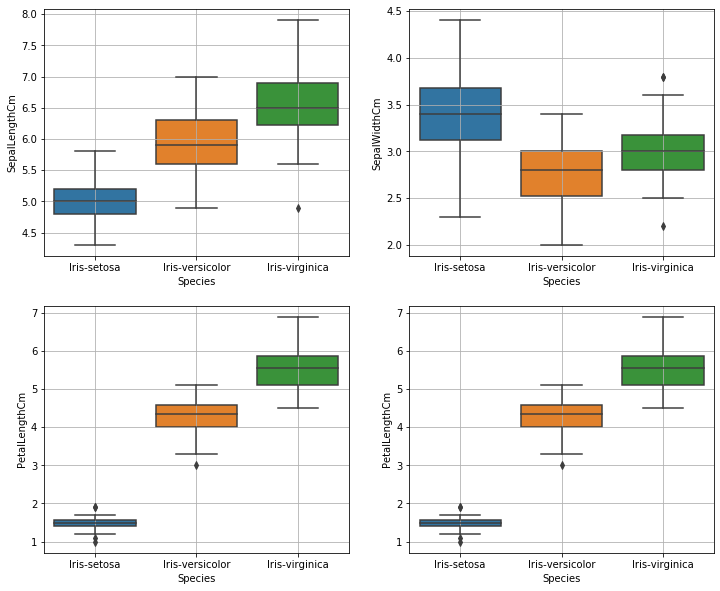

In [258]:
plt.figure(figsize=(12,10))

plt.subplot(221)
sns.boxplot(df_iris.Species,df_iris.SepalLengthCm,data=df_iris)
plt.grid()

plt.subplot(222)
sns.boxplot(df_iris.Species,df_iris.SepalWidthCm,data=df_iris)
plt.grid()

plt.subplot(223)
sns.boxplot(df_iris.Species,df_iris.PetalLengthCm,data=df_iris)
plt.grid()

plt.subplot(224)
sns.boxplot(df_iris.Species,df_iris.PetalLengthCm,data=df_iris)
plt.grid()

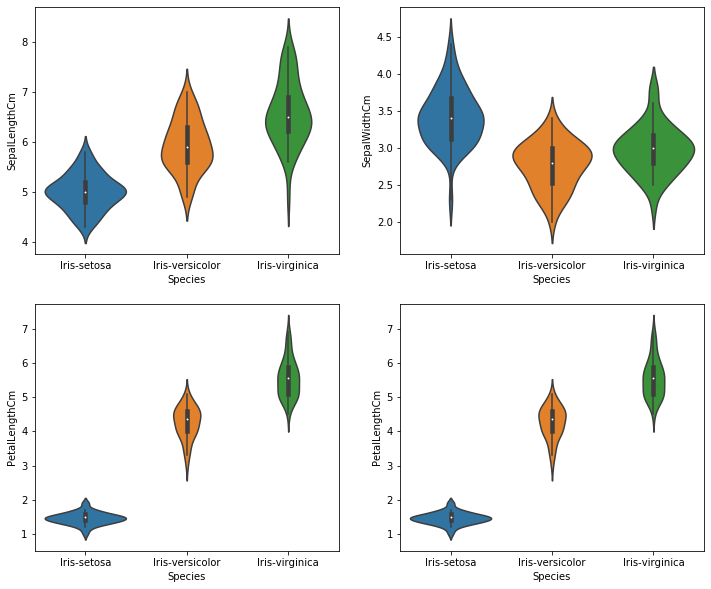

In [259]:
plt.figure(figsize=(12,10))

plt.subplot(221)
sns.violinplot(df_iris.Species,df_iris.SepalLengthCm,data=df_iris)

plt.subplot(222)
sns.violinplot(df_iris.Species,df_iris.SepalWidthCm,data=df_iris)

plt.subplot(223)
sns.violinplot(df_iris.Species,df_iris.PetalLengthCm,data=df_iris)

plt.subplot(224)
sns.violinplot(df_iris.Species,df_iris.PetalLengthCm,data=df_iris)

In [260]:
# Perform Categorical encoding

In [261]:
df_iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [262]:
df_iris['Species_Categorical']=df_iris['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])

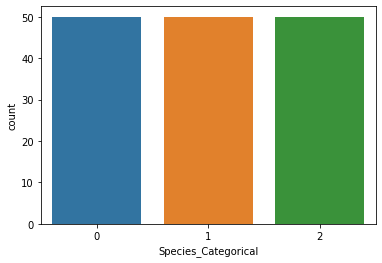

In [263]:
sns.countplot(df_iris.Species_Categorical);

In [264]:
# Modelling the data

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [266]:
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_Categorical'],
      dtype='object')

In [267]:
X=df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y=df_iris[['Species_Categorical']]

In [268]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [269]:
model_log=LogisticRegression()
model_log.fit(X_train,Y_train)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [270]:
predict_Y=model_log.predict(X_test)

In [271]:
from sklearn.metrics import classification_report

In [272]:
print(classification_report(Y_test,predict_Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

